# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

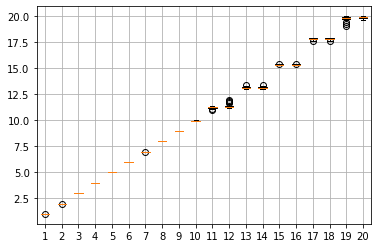

In [2]:
w_x = np.linspace(1, 20, 20) #miejsca zerowe
n_x = main.polly_A(w_x) #współczynniki wielomianu

iter = []

for i in range(20):
    A, x0 = main.roots_20(n_x)
    iter.append(x0)
    
plt.boxplot(np.real(iter))
plt.grid()
plt.show()

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

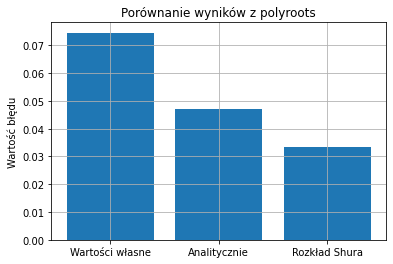

In [55]:
w1_x = np.array([1]*8)
x0_1 = main.polly_A(w1_x)

frobenious_matrix, eig_vector, schure_vector, x0_vector = main.frob_a(x0_1[:-1])

x = np.arange(3)
eigs = np.sort(eig_vector)
schure = np.sort(np.diag(schure_vector[0]))
roots = np.sort(P.polyroots(x0_1))


error = [np.linalg.norm(roots - eigs), np.linalg.norm(roots - w1_x), np.linalg.norm(roots - schure)]

plt.bar(x, error)
plt.ylabel('Wartość błędu')
plt.xticks(x, ('Wartości własne','Analitycznie', 'Rozkład Shura'))
plt.title('Porównanie wyników z polyroots')
plt.grid()
plt.show()

Najbardziej dokładny jest rozkład Schura. 

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


In [54]:
w2_x = np.array([243, -486, 783, -990, 558, -28, -72, 16])
good_w2_x = w2_x[::-1] #powinno być od najmniejszej do największej potęgi
good = good_w2_x/good_w2_x[len(w2_x)-1] #przy najwyżej potędze musi stać 1 więc dzielimi przez 243

w2_x0 = P.polyroots(good_w2_x)
frobenious_matrix, eig_vector, schure_vector, x0_vector = main.frob_a(good[:-1])

print(f'Miejsca zerowe: {np.sort(w2_x0)}')
print(f'Wartośći własne: {np.sort(eig_vector)}')
print(f'Rozkład Schura {np.sort(np.diag(schure_vector[0]))}') #tylko części rzeczywiste

Miejsca zerowe: [-3.33333333e-01+0.00000000e+00j -6.45317133e-16-1.41421356e+00j
 -6.45317133e-16+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66663880e-01+0.00000000e+00j  6.66668060e-01-2.41373267e-06j
  6.66668060e-01+2.41373267e-06j]
Wartośći własne: [-0.33333333+0.00000000e+00j  0.        -1.41421356e+00j
  0.        +1.41421356e+00j  0.33333333+0.00000000e+00j
  0.66666413-4.39477175e-06j  0.66666413+4.39477175e-06j
  0.66667174+0.00000000e+00j]
Rozkład Schura [-3.33333333e-01 -2.63677968e-16 -2.63677968e-16  3.33333333e-01
  6.66662323e-01  6.66662323e-01  6.66675355e-01]


Możemy zauważyć, że otrzymane 3 zestawy wyników miejsc zerowych są do siebie zbliżone. Oczywiście z pewnymi błędami numerycznimi, ale możemy przypuszczać, iż są poprawne.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [73]:
import numpy.polynomial.chebyshev as cheb

a = np.array([-624, 4, 780, -5, -156, 1])
w3_x0 = P.polyroots(w3_x)

cheb_rank = np.array([a[0] + a[2]/2 + 3*a[4]/4, a[1] + 3*a[3]/4 + 5*a[5]/8, a[2]/2 + a[4]/4, a[3]/4 + 5*a[5]/16,a[4]/8, a[5]/16])

k = cheb.chebroots((cheb_rank))

print(f'Miejsca zerowe (polyroots): {w3_x0}')
print(f'Miejsca zerowe (chebroots): {k}')

Miejsca zerowe (polyroots): [ -2.  -1.   1.   2. 156.]
Miejsca zerowe (chebroots): [ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]
